<a href="https://colab.research.google.com/github/harshita2319/sentiment-analysis/blob/main/Copy_of_Final_ML_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load your CSV files
netflix_movies = pd.read_csv('/content/Netflix_movies_and_tv_shows_clustering.csv')
tv_shows = pd.read_csv('/content/TMDB_tv_dataset_v3.csv')

# Rename 'name' to 'title' and 'overview' to 'description' in the TV shows dataset
tv_shows.rename(columns={'name': 'title', 'overview': 'description'}, inplace=True)

# Select only the relevant columns and add a 'type' column to the TV shows dataset
netflix_movies_cleaned = netflix_movies[['type', 'title', 'description']]
tv_shows_cleaned = tv_shows[['title', 'description']]
tv_shows_cleaned['type'] = 'TV Show'

# Reorder columns to match the movie dataset
tv_shows_cleaned = tv_shows_cleaned[['type', 'title', 'description']]

# Merge the two datasets
combined_data = pd.concat([netflix_movies_cleaned, tv_shows_cleaned], ignore_index=True)

# Save the cleaned and combined dataset
combined_data.to_csv('cleaned_combined_netflix_tvshows.csv', index=False)

print("Datasets merged and saved successfully!")

<ipython-input-1-4c4edc93d647>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_cleaned['type'] = 'TV Show'


Datasets merged and saved successfully!


In [ ]:
tv_shows_cleaned.count()

,0
type,168639
title,168634
description,93333


In [ ]:
netflix_movies_cleaned.count()

,0
type,7787
title,7787
description,7787


In [ ]:
combined_data.count()

,0
type,96655
title,96655
description,96655
cleaned_description,96655
description_length,96655


In [ ]:
combined_data.head()

,type,title,description
0,TV Show,3%,In a future where the elite inhabit an island ...
1,Movie,7:19,After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,"When an army recruit is found dead, his fellow..."
3,Movie,9,"In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,A brilliant group of students become card-coun...


In [ ]:
# Check data types of the columns
print(combined_data.dtypes)


type           object
title          object
description    object
dtype: object


In [ ]:
# Retain only necessary columns: type, title, description
combined_data = combined_data[['type', 'title', 'description']]


In [ ]:
# Check for missing values
print(combined_data.isnull().sum())

# Drop rows where the description is missing
combined_data = combined_data.dropna(subset=['description'])

type               0
title              5
description    75306
dtype: int64


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean the description text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a string
    return ' '.join(tokens)

# Apply the clean_text function to the 'description' column
combined_data['cleaned_description'] = combined_data['description'].apply(clean_text)

# Display the first few cleaned rows
combined_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,type,title,description,cleaned_description
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...
2,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...
3,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...
4,Movie,21,A brilliant group of students become card-coun...,brilliant group student become cardcounting ex...


In [ ]:
combined_data.count()

,0
type,96655
title,96655
description,96655
cleaned_description,96655
description_length,96655


In [ ]:
#Checking outlies in the description
# Add a column for description length
combined_data['description_length'] = combined_data['cleaned_description'].apply(lambda x: len(x.split()))

# Visualize or check description lengths
print(combined_data['description_length'].describe())

# Remove descriptions that are too short (e.g., less than 5 words)
combined_data = combined_data[combined_data['description_length'] >= 5]


count    98765.000000
mean        32.916519
std         27.024850
min          0.000000
25%         15.000000
50%         24.000000
75%         43.000000
max        978.000000
Name: description_length, dtype: float64


In [ ]:
# Remove descriptions that are too short (e.g., less than 5 words)
combined_data = combined_data[combined_data['description_length'] >= 5]


In [ ]:
# Remove descriptions with 0 length
combined_data = combined_data[combined_data['description_length'] > 0]


In [ ]:
# Cap maximum description length if needed (e.g., max 300 words)
max_length = 200
combined_data = combined_data[combined_data['description_length'] <= max_length]


In [ ]:
# 200 length max of description Recheck the description lengths after filtering
print(combined_data['description_length'].describe())


count    96622.000000
mean        33.461085
std         26.318608
min          5.000000
25%         15.000000
50%         24.000000
75%         43.000000
max        199.000000
Name: description_length, dtype: float64


In [ ]:
# Recheck the description lengths after filtering
print(combined_data['description_length'].describe())


count    96655.000000
mean        33.527205
std         26.561480
min          5.000000
25%         15.000000
50%         24.000000
75%         43.000000
max        296.000000
Name: description_length, dtype: float64


In [ ]:
# # Save the cleaned dataset
# combined_data.to_csv('final_cleaned_netflix_tvshows.csv', index=False)

import pandas as pd

# Load your existing cleaned dataset (without genre/genres)
combined_cleaned_data = pd.read_csv('final_cleaned_netflix_tvshows.csv')  # Make sure this matches the saved file name


In [ ]:
# Load your CSV files
netflix_movies = pd.read_csv('/content/Netflix_movies_and_tv_shows_clustering.csv')  # Replace with your path
tv_shows = pd.read_csv('/content/TMDB_tv_dataset_v3.csv')  # Replace with your path


# For Netflix, we'll use the 'listed_in' column; for TV shows, we'll assume it's 'genre'
netflix_genres = netflix_movies[['title', 'listed_in']]
tv_shows_genres = tv_shows[['name', 'genres']]  # Adjust column names if needed
tv_shows_genres.rename(columns={'name': 'title', 'genres': 'listed_in'}, inplace=True)


<ipython-input-22-036467717907>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_genres.rename(columns={'name': 'title', 'genres': 'listed_in'}, inplace=True)


In [ ]:
# Merge genre information back into the cleaned dataset
netflix_cleaned_with_genres = pd.merge(combined_cleaned_data,
                                       pd.concat([netflix_genres, tv_shows_genres], ignore_index=True),
                                       on='title', how='left')

# Check the dataset
print(netflix_cleaned_with_genres.head())


      type  title                                        description  \
0  TV Show     3%  In a future where the elite inhabit an island ...   
1  TV Show     3%  In a future where the elite inhabit an island ...   
2    Movie   7:19  After a devastating earthquake hits Mexico Cit...   
3    Movie  23:59  When an army recruit is found dead, his fellow...   
4    Movie      9  In a postapocalyptic world, rag-doll robots hi...   

                                 cleaned_description  description_length  \
0  future elite inhabit island paradise far crowd...                  15   
1  future elite inhabit island paradise far crowd...                  15   
2  devastating earthquake hit mexico city trapped...                  15   
3  army recruit found dead fellow soldier forced ...                  16   
4  postapocalyptic world ragdoll robot hide fear ...                  13   

                                           listed_in  
0  International TV Shows, TV Dramas, TV Sci-Fi &...  


In [ ]:
# Check the available columns in both datasets to find the correct genre-related column
print(netflix_movies.columns)
print(tv_shows.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['id', 'name', 'number_of_seasons', 'number_of_episodes',
       'original_language', 'vote_count', 'vote_average', 'overview', 'adult',
       'backdrop_path', 'first_air_date', 'last_air_date', 'homepage',
       'in_production', 'original_name', 'popularity', 'poster_path', 'type',
       'status', 'tagline', 'genres', 'created_by', 'languages', 'networks',
       'origin_country', 'spoken_languages', 'production_companies',
       'production_countries', 'episode_run_time'],
      dtype='object')


In [ ]:
# Check the columns in the combined dataset
print(combined_data.columns)


Index(['type', 'title', 'description', 'cleaned_description',
       'description_length'],
      dtype='object')


In [ ]:
print(combined_cleaned_data.columns)
print(netflix_genres.columns)
print(tv_shows_genres.columns)


Index(['type', 'title', 'description', 'cleaned_description',
       'description_length'],
      dtype='object')
Index(['title', 'listed_in'], dtype='object')
Index(['title', 'listed_in'], dtype='object')


In [ ]:
# Check if the listed_in column was successfully merged
print(netflix_cleaned_with_genres[['title', 'listed_in']].head())


   title                                          listed_in
0     3%  International TV Shows, TV Dramas, TV Sci-Fi &...
1     3%                            Drama, Sci-Fi & Fantasy
2   7:19                       Dramas, International Movies
3  23:59                Horror Movies, International Movies
4      9  Action & Adventure, Independent Movies, Sci-Fi...


In [ ]:
# Check columns in the merged dataset
print(combined_cleaned_data.columns)


Index(['type', 'title', 'description', 'cleaned_description',
       'description_length'],
      dtype='object')


In [ ]:
# Check if the 'listed_in' (genre) column is now present in netflix_cleaned_with_genres
print(netflix_cleaned_with_genres.columns)

# Check a few rows to see if the 'listed_in' column has the genre data
print(netflix_cleaned_with_genres[['title', 'listed_in']].head())


Index(['type', 'title', 'description', 'cleaned_description',
       'description_length', 'listed_in'],
      dtype='object')
   title                                          listed_in
0     3%  International TV Shows, TV Dramas, TV Sci-Fi &...
1     3%                            Drama, Sci-Fi & Fantasy
2   7:19                       Dramas, International Movies
3  23:59                Horror Movies, International Movies
4      9  Action & Adventure, Independent Movies, Sci-Fi...


In [ ]:
# Fill NaN values with an empty string before splitting
netflix_cleaned_with_genres['listed_in'] = netflix_cleaned_with_genres['listed_in'].fillna('')

# Split the 'listed_in' column by commas to handle multiple genres
netflix_cleaned_with_genres['listed_in_split'] = netflix_cleaned_with_genres['listed_in'].str.split(',')

# Strip any leading/trailing spaces from each genre
netflix_cleaned_with_genres['listed_in_split'] = netflix_cleaned_with_genres['listed_in_split'].apply(lambda x: [i.strip() for i in x if isinstance(i, str)])


In [ ]:
# Split the 'listed_in' column by commas and explode into individual genres
netflix_cleaned_with_genres['listed_in_split'] = netflix_cleaned_with_genres['listed_in'].str.split(',')

# Strip leading/trailing spaces
netflix_cleaned_with_genres['listed_in_split'] = netflix_cleaned_with_genres['listed_in_split'].apply(lambda x: [i.strip() for i in x if isinstance(i, str)])

# Explode the list into individual rows to flatten the genre lists
exploded_genres = netflix_cleaned_with_genres.explode('listed_in_split')

# Get distinct genres from the 'listed_in_split' column
distinct_genres = exploded_genres['listed_in_split'].unique()

# Print the distinct genres
print(distinct_genres)


['International TV Shows' 'TV Dramas' 'TV Sci-Fi & Fantasy' 'Drama'
 'Sci-Fi & Fantasy' 'Dramas' 'International Movies' 'Horror Movies'
 'Action & Adventure' 'Independent Movies' '' 'TV Mysteries' 'Thrillers'
 'Crime TV Shows' 'Crime' 'Mystery' 'Docuseries' 'Documentary'
 'Documentaries' 'Sports Movies' 'Comedies' 'Anime Series' 'Reality TV'
 'Reality' 'TV Comedies' 'Comedy' 'Romantic Movies' 'Romantic TV Shows'
 'Science & Nature TV' 'Movies' 'British TV Shows' 'Korean TV Shows'
 'Talk' 'Music & Musicals' 'LGBTQ Movies' 'Faith & Spirituality'
 "Kids' TV" 'TV Action & Adventure' 'Animation' 'Family' 'Kids'
 'Spanish-Language TV Shows' 'Children & Family Movies' 'TV Shows'
 'Classic Movies' 'Cult Movies' 'TV Horror' 'Stand-Up Comedy & Talk Shows'
 'Teen TV Shows' 'Stand-Up Comedy' 'Anime Features' 'TV Thrillers'
 'Romance' 'News' 'War & Politics' 'Soap' 'Classic & Cult TV' 'Western'
 'History' 'Musical' 'Music']


In [ ]:
# Define the genre-sentiment mapping (based on the mapping we created earlier)
genre_sentiment_mapping = {
    'comedies': 'positive',
    'comedy': 'positive',
    'romantic movies': 'positive',
    'romantic tv shows': 'positive',
    'family': 'positive',
    'kids': 'positive',
    "children & family movies": 'positive',
    'music & musicals': 'positive',
    'stand-up comedy': 'positive',
    'stand-up comedy & talk shows': 'positive',
    'teen tv shows': 'positive',
    'animation': 'positive',
    "kids' tv": 'positive',
    'faith & spirituality': 'positive',
    'musical': 'positive',

    # Negative sentiment
    'horror movies': 'negative',
    'thrillers': 'negative',
    'crime tv shows': 'negative',
    'crime': 'negative',
    'mystery': 'negative',
    'tv horror': 'negative',
    'tv thrillers': 'negative',
    'war & politics': 'negative',
    'western': 'negative',

    # Neutral sentiment
    'international tv shows': 'neutral',
    'tv dramas': 'neutral',
    'tv sci-fi & fantasy': 'neutral',
    'drama': 'neutral',
    'sci-fi & fantasy': 'neutral',
    'dramas': 'neutral',
    'international movies': 'neutral',
    'action & adventure': 'neutral',
    'independent movies': 'neutral',
    'docuseries': 'neutral',
    'documentary': 'neutral',
    'documentaries': 'neutral',
    'sports movies': 'neutral',
    'anime series': 'neutral',
    'reality tv': 'neutral',
    'reality': 'neutral',
    'tv comedies': 'neutral',
    'science & nature tv': 'neutral',
    'movies': 'neutral',
    'british tv shows': 'neutral',
    'korean tv shows': 'neutral',
    'talk': 'neutral',
    'lgbtq movies': 'neutral',
    'spanish-language tv shows': 'neutral',
    'tv shows': 'neutral',
    'classic movies': 'neutral',
    'cult movies': 'neutral',
    'news': 'neutral',
    'soap': 'neutral',
    'classic & cult tv': 'neutral',
    'history': 'neutral',
    'music': 'neutral',
}

# Function to assign sentiment based on the genres in 'listed_in_split'
def assign_sentiment(genre_list):
    for genre, sentiment in genre_sentiment_mapping.items():
        # Check if any genre in the list matches the mapping (case-insensitive)
        if any(genre.lower() in g.lower() for g in genre_list):
            return sentiment
    return 'neutral'  # Default to neutral if no matching genre is found

# Apply the sentiment assignment function to each row
netflix_cleaned_with_genres['sentiment'] = netflix_cleaned_with_genres['listed_in_split'].apply(assign_sentiment)

# Check the dataset with the new 'sentiment' column
print(netflix_cleaned_with_genres[['title', 'listed_in', 'sentiment']].head())


   title                                          listed_in sentiment
0     3%  International TV Shows, TV Dramas, TV Sci-Fi &...   neutral
1     3%                            Drama, Sci-Fi & Fantasy   neutral
2   7:19                       Dramas, International Movies   neutral
3  23:59                Horror Movies, International Movies  negative
4      9  Action & Adventure, Independent Movies, Sci-Fi...   neutral


In [ ]:
# Save the dataset with the sentiment column
netflix_cleaned_with_genres.to_csv('final_combined_with_sentiment.csv', index=False)

print("Dataset with sentiment column saved successfully!")


Dataset with sentiment column saved successfully!


In [ ]:
import pandas as pd

# Fill missing values in the 'listed_in' column with 'unknown'
netflix_cleaned_with_genres['listed_in'] = netflix_cleaned_with_genres['listed_in'].fillna('unknown')

# Split the 'listed_in' column by commas to handle multiple genres
netflix_cleaned_with_genres['listed_in_split'] = netflix_cleaned_with_genres['listed_in'].str.split(',')

# Strip leading/trailing spaces
netflix_cleaned_with_genres['listed_in_split'] = netflix_cleaned_with_genres['listed_in_split'].apply(lambda x: [i.strip() for i in x if isinstance(i, str)])

# Optionally, handle missing split genres by filling them with an empty list
netflix_cleaned_with_genres['listed_in_split'] = netflix_cleaned_with_genres['listed_in_split'].apply(lambda x: [] if x is None else x)

# Check the result
print(netflix_cleaned_with_genres[['title', 'listed_in', 'listed_in_split', 'sentiment']].head())


   title                                          listed_in  \
0     3%  International TV Shows, TV Dramas, TV Sci-Fi &...   
1     3%                            Drama, Sci-Fi & Fantasy   
2   7:19                       Dramas, International Movies   
3  23:59                Horror Movies, International Movies   
4      9  Action & Adventure, Independent Movies, Sci-Fi...   

                                     listed_in_split sentiment  
0  [International TV Shows, TV Dramas, TV Sci-Fi ...   neutral  
1                          [Drama, Sci-Fi & Fantasy]   neutral  
2                     [Dramas, International Movies]   neutral  
3              [Horror Movies, International Movies]  negative  
4  [Action & Adventure, Independent Movies, Sci-F...   neutral  


In [ ]:
# Analyze the distribution of sentiment labels
sentiment_distribution = netflix_cleaned_with_genres['sentiment'].value_counts()

# Print the result
print(sentiment_distribution)


sentiment
neutral     78963
positive    34776
negative    11591
Name: count, dtype: int64


In [ ]:
# dropping genre based sentiment column

# Drop the existing genre-based sentiment column
netflix_cleaned_with_genres = netflix_cleaned_with_genres.drop(columns=['sentiment'])


In [ ]:
# Tokenize descriptions
descriptions = [desc.split() for desc in netflix_cleaned_with_genres['cleaned_description']]


In [ ]:
from gensim.models import Word2Vec

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=5, workers=4)

# Save the model for future use
word2vec_model.save('word2vec_model.model')

## discarded


In [ ]:
from gensim.models import Word2Vec

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=8, workers=4)

# Save the model for future use
word2vec_model.save('word2vec_model.model')


In [ ]:
import numpy as np

# Convert each description into a vector
def description_to_vector(description, model):
    words = description.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)  # Average word vectors
    else:
        return np.zeros(model.vector_size)  # Return zero vector if no words are found

# Apply the conversion function to each description
netflix_cleaned_with_genres['description_vector'] = netflix_cleaned_with_genres['cleaned_description'].apply(lambda x: description_to_vector(x, word2vec_model))

# Check the result
print(netflix_cleaned_with_genres[['title', 'description_vector']].head())


   title                                 description_vector
0     3%  [0.32392597, 0.26834556, -0.91470665, -0.09709...
1     3%  [0.32392597, 0.26834556, -0.91470665, -0.09709...
2   7:19  [0.2068421, 0.7672765, -0.85394317, -0.5194377...
3  23:59  [0.43270493, 0.5936025, -0.9664011, -0.5697893...
4      9  [0.24416001, -0.07725958, -0.5784077, -0.43010...


In [ ]:
# Set a minimum count threshold (e.g., words must appear at least 5 times to be included)
min_count_threshold = 8

# Get words and their frequencies from the Word2Vec model
word_frequencies = word2vec_model.wv.index_to_key  # Get words from the vocabulary

# Filter out words that appear less than 'min_count_threshold' times
filtered_words = [word for word in word_frequencies if word2vec_model.wv.get_vecattr(word, 'count') >= min_count_threshold]

# Check the number of filtered words
print(f"Number of words remaining after filtering: {len(filtered_words)}")


Number of words remaining after filtering: 27969


In [ ]:
from gensim.models import Word2Vec

# Re-train the Word2Vec model, for example with min_count=5
word2vec_model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=8, workers=4)


In [ ]:
# min_count = 8
# Check similarity between two words (e.g., 'comedy' and 'drama')
similarity = word2vec_model.wv.similarity('comedy', 'drama')
print(f"Similarity between 'comedy' and 'drama': {similarity}")

# Find the top 5 most similar words to 'comedy'
similar_words = word2vec_model.wv.most_similar('comedy', topn=5)
print(similar_words)


Similarity between 'comedy' and 'drama': 0.3557581305503845
[('sitcom', 0.5597643852233887), ('sketch', 0.550129771232605), ('comedydrama', 0.5325407981872559), ('dramedy', 0.519679069519043), ('comedic', 0.5113963484764099)]


In [ ]:
# min_count=8  Check similarity for other genre pairs
happy_fun_similarity = word2vec_model.wv.similarity('happy', 'fun')
print(f"Similarity between 'happy' and 'fun': {happy_fun_similarity}")

# Most similar words to 'happy'
similar_words_to_romance = word2vec_model.wv.most_similar('happy', topn=5)
print(similar_words_to_romance)


Similarity between 'happy' and 'fun': 0.3574601411819458
[('loving', 0.6514948010444641), ('interrupted', 0.6283597946166992), ('happiness', 0.6146730780601501), ('worry', 0.6088782548904419), ('dull', 0.6039652228355408)]


In [ ]:
!pip install scikit-learn matplotlib


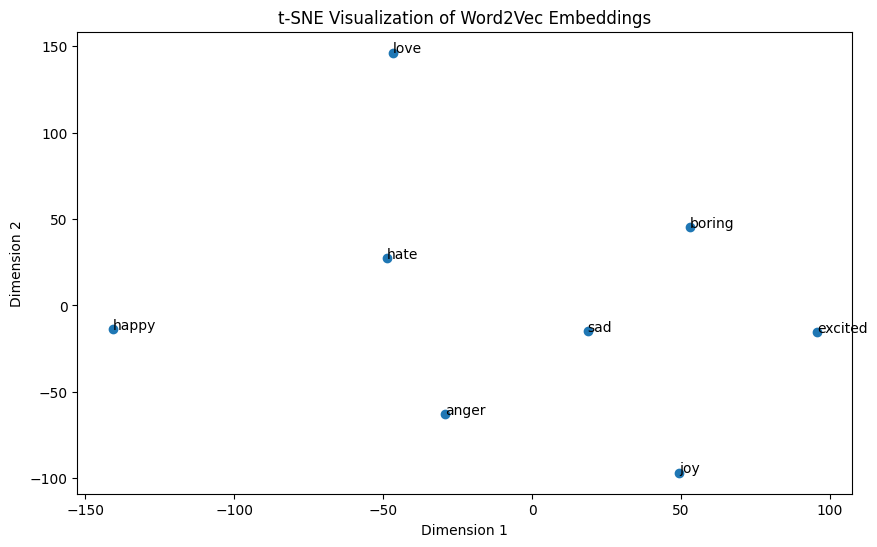

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define the list of words to visualize (either manually or by sampling)
# Example: manually define words to visualize
words_to_visualize = ['happy', 'sad', 'joy', 'anger', 'excited', 'boring', 'love', 'hate']

# You can also randomly sample words from the vocabulary
# words_to_visualize = np.random.choice(word2vec_model.wv.index_to_key, size=20, replace=False)

# Convert the list of word vectors to a NumPy array
word_vectors = np.array([word2vec_model.wv[word] for word in words_to_visualize])

# Apply t-SNE with a lower perplexity (set to less than the number of words)
tsne_model = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_vectors = tsne_model.fit_transform(word_vectors)

# Create a scatter plot of the reduced vectors
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

# Add plot labels and title
plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
netflix_cleaned_with_genres.head()

,type,title,description,cleaned_description,description_length,listed_in,listed_in_split,sentiment,description_vector
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"International TV Shows, TV Dramas, TV Sci-Fi &...","[International TV Shows, TV Dramas, TV Sci-Fi ...",neutral,"[0.32392597, 0.26834556, -0.91470665, -0.09709..."
1,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"Drama, Sci-Fi & Fantasy","[Drama, Sci-Fi & Fantasy]",neutral,"[0.32392597, 0.26834556, -0.91470665, -0.09709..."
2,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...,15,"Dramas, International Movies","[Dramas, International Movies]",neutral,"[0.2068421, 0.7672765, -0.85394317, -0.5194377..."
3,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...,16,"Horror Movies, International Movies","[Horror Movies, International Movies]",negative,"[0.43270493, 0.5936025, -0.9664011, -0.5697893..."
4,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...,13,"Action & Adventure, Independent Movies, Sci-Fi...","[Action & Adventure, Independent Movies, Sci-F...",neutral,"[0.24416001, -0.07725958, -0.5784077, -0.43010..."


In [ ]:
netflix_cleaned_with_genres.describe()

,description_length
count,125330.000000
mean,33.233847
std,26.316736
min,5.000000
25%,15.000000
50%,24.000000
75%,43.000000
max,199.000000


In [ ]:
netflix_cleaned_with_genres.describe()

,description_length
count,125330.000000
mean,33.233847
std,26.316736
min,5.000000
25%,15.000000
50%,24.000000
75%,43.000000
max,199.000000


In [ ]:
# Print first 5 records where the sentiment is 'happy'
happy_records = netflix_cleaned_with_genres[netflix_cleaned_with_genres['sentiment'] == 'positive']
happy_records.head()


,type,title,description,cleaned_description,description_length,listed_in,listed_in_split,sentiment,description_vector
23,Movie,15-Aug,"On India's Independence Day, a zany mishap in ...",india independence day zany mishap mumbai chaw...,17,"Comedies, Dramas, Independent Movies","[Comedies, Dramas, Independent Movies]",positive,"[0.2825301, 0.4234516, -0.75509715, 0.23767082..."
35,TV Show,#blackAF,Kenya Barris and his family navigate relations...,kenya barris family navigate relationship race...,12,TV Comedies,[TV Comedies],positive,"[0.22130704, 0.18917036, 0.41807905, 0.4542850..."
36,TV Show,#blackAF,Kenya Barris and his family navigate relations...,kenya barris family navigate relationship race...,12,Comedy,[Comedy],positive,"[0.22130704, 0.18917036, 0.41807905, 0.4542850..."
38,Movie,#FriendButMarried,"Pining for his high school crush for years, a ...",pining high school crush year young man put be...,17,"Dramas, International Movies, Romantic Movies","[Dramas, International Movies, Romantic Movies]",positive,"[0.48109093, 0.380882, -0.72450835, -0.1690900..."
39,Movie,#FriendButMarried 2,As Ayu and Ditto finally transition from best ...,ayu ditto finally transition best friend newly...,14,"Dramas, International Movies, Romantic Movies","[Dramas, International Movies, Romantic Movies]",positive,"[0.46721703, 0.13126864, -0.36394888, 0.369303..."


In [ ]:
# Print first 5 records where the sentiment is 'happy'
negative_records = netflix_cleaned_with_genres[netflix_cleaned_with_genres['sentiment'] == 'negative']
negative_records.head()


,type,title,description,cleaned_description,description_length,listed_in,listed_in_split,description_vector,sentiment
3,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...,16,"Horror Movies, International Movies","[Horror Movies, International Movies]","[0.1456348, 0.93806034, -1.1231152, -0.3835179...",negative
8,Movie,122,"After an awful accident, a couple admitted to ...",awful accident couple admitted grisly hospital...,12,"Horror Movies, International Movies","[Horror Movies, International Movies]","[0.59584516, 0.9594955, -1.3675321, 0.31837586...",negative
10,Movie,706,"When a doctor goes missing, his psychiatrist w...",doctor go missing psychiatrist wife treat biza...,15,"Horror Movies, International Movies","[Horror Movies, International Movies]","[-0.2836183, 0.6648009, -0.67680943, 0.3087254...",negative
11,Movie,1920,An architect and his wife move into a castle t...,architect wife move castle slated become luxur...,13,"Horror Movies, International Movies, Thrillers","[Horror Movies, International Movies, Thrillers]","[0.11494863, 0.47365856, -1.0049497, -0.409982...",negative
12,Movie,1922,A farmer pens a confession admitting to his wi...,farmer pen confession admitting wife murder de...,14,"Dramas, Thrillers","[Dramas, Thrillers]","[0.057053983, -0.038641214, -0.4487073, -0.808...",negative


In [ ]:
# Print first 5 records where the sentiment is 'happy'
nuetral_records = netflix_cleaned_with_genres[netflix_cleaned_with_genres['sentiment'] == 'neutral']
nuetral_records.head()


,type,title,description,cleaned_description,description_length,listed_in,listed_in_split,description_vector,sentiment
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"International TV Shows, TV Dramas, TV Sci-Fi &...","[International TV Shows, TV Dramas, TV Sci-Fi ...","[0.052997276, 0.44743502, -1.0266455, -0.08722...",neutral
1,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"Drama, Sci-Fi & Fantasy","[Drama, Sci-Fi & Fantasy]","[0.052997276, 0.44743502, -1.0266455, -0.08722...",neutral
2,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...,15,"Dramas, International Movies","[Dramas, International Movies]","[0.03265597, 1.1521661, -0.96612066, -0.662373...",neutral
4,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...,13,"Action & Adventure, Independent Movies, Sci-Fi...","[Action & Adventure, Independent Movies, Sci-F...","[-0.29833034, 0.21275936, -0.47026408, -0.2635...",neutral
5,Movie,21,A brilliant group of students become card-coun...,brilliant group student become cardcounting ex...,14,Dramas,[Dramas],"[-0.3574346, -0.35542712, -0.41323513, -0.3206...",neutral


In [ ]:
# Print 10 random records with descriptions, genres, and assigned sentiment
random_sample = netflix_cleaned_with_genres[['description', 'listed_in', 'sentiment']].sample(n=10)
random_sample.head()


,description,listed_in,sentiment
37466,An explosion take place in a street of Tokyo. ...,Crime,negative
57958,Bands Reunited is a television program produce...,,neutral
17478,Murphy Brown (Candice Bergen) is a recovering ...,Comedy,positive
30650,"In America, football is king ... and nowhere i...",Reality,neutral
96478,"Kids' Ten Commandments was a direct-to-video, ...",,neutral


In [ ]:
# Group by sentiment and see how many records are mapped to each sentiment
sentiment_distribution = netflix_cleaned_with_genres.groupby('sentiment').size()
print(sentiment_distribution)


sentiment
negative    11591
neutral     78963
positive    34776
dtype: int64


In [ ]:
# Group by genre and sentiment
genre_sentiment_distribution = netflix_cleaned_with_genres.groupby(['listed_in', 'sentiment']).size()
print(genre_sentiment_distribution)


listed_in                                                 sentiment
                                                          neutral      35476
Action & Adventure                                        neutral        669
Action & Adventure, Animation                             positive       137
Action & Adventure, Animation, Comedy                     positive        67
Action & Adventure, Animation, Comedy, Crime              positive         1
                                                                       ...  
Western, Mystery                                          negative         1
Western, Sci-Fi & Fantasy                                 negative         6
Western, Sci-Fi & Fantasy, Action & Adventure, Animation  positive         1
Western, Sci-Fi & Fantasy, Action & Adventure, Drama      negative         1
Western, Sci-Fi & Fantasy, Comedy                         positive         1
Length: 2433, dtype: int64


In [ ]:
from textblob import TextBlob

# Function to predict sentiment using TextBlob
def get_textblob_sentiment(description):
    analysis = TextBlob(description)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to the descriptions
netflix_cleaned_with_genres['textblob_sentiment'] = netflix_cleaned_with_genres['description'].apply(get_textblob_sentiment)

# Compare the generated sentiment labels with TextBlob's sentiment
comparison = netflix_cleaned_with_genres[['description', 'sentiment', 'textblob_sentiment']].sample(n=10)
print(comparison)


                                              description sentiment  \
113894  "The Confidant" depicts how a group of eunuchs...   neutral   
39497   With breath-taking CGI, beautiful landscape fo...   neutral   
74271   Captain Zed and the Zee Zone follows dream pat...  positive   
34198   Mackenzie, Katie, Briana, and Alex from the fo...   neutral   
29502   A new take on the variety show where host Jose...  positive   
39773   Secret of the Heart is a 1998 TVB production t...  negative   
71023   Wok Of Life is a long-running Chinese drama wh...   neutral   
71751   Mika Yoshizawa (Airi Matsui) is a "SMARTwoman"...   neutral   
159     Spiced liberally with black comedy, this Bolly...  negative   
15456   Laura Holt, a licensed private detective, open...  positive   

       textblob_sentiment  
113894           positive  
39497            positive  
74271            negative  
34198            positive  
29502            positive  
39773            positive  
71023            posit

In [ ]:
from textblob import TextBlob

# Function to generate sentiment using TextBlob
def get_textblob_sentiment(description):
    analysis = TextBlob(description)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to your description column to generate sentiment labels
netflix_cleaned_with_genres['textblob_sentiment'] = netflix_cleaned_with_genres['description'].apply(get_textblob_sentiment)

# Check the results
print(netflix_cleaned_with_genres[['description', 'textblob_sentiment']].head())


                                         description textblob_sentiment
0  In a future where the elite inhabit an island ...           positive
1  In a future where the elite inhabit an island ...           positive
2  After a devastating earthquake hits Mexico Cit...           negative
3  When an army recruit is found dead, his fellow...           negative
4  In a postapocalyptic world, rag-doll robots hi...           positive


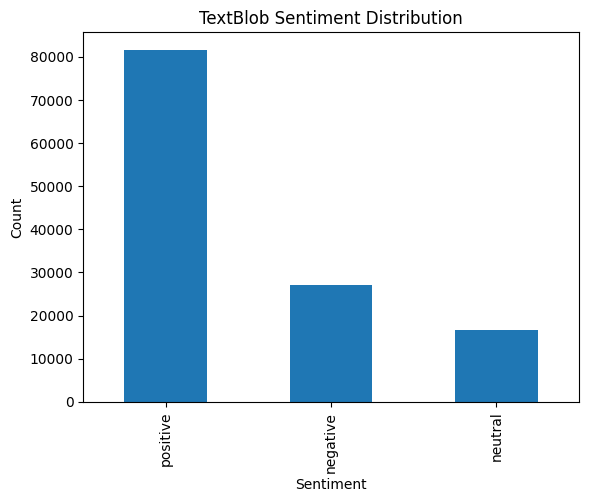

In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of sentiment labels
netflix_cleaned_with_genres['textblob_sentiment'].value_counts().plot(kind='bar', title='TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
netflix_cleaned_with_genres.count()

,0
type,125330
title,125330
description,125330
cleaned_description,125330
description_length,125330
listed_in,125330
listed_in_split,125330
sentiment,125330
description_vector,125330
textblob_sentiment,125330


In [ ]:
# Save the cleaned dataset as a CSV
netflix_cleaned_with_genres.to_csv('/content/drive/My Drive/final_cleaned_dataset.csv', index=False)


In [ ]:
# Check for duplicates based on title and description
duplicates = netflix_cleaned_with_genres[netflix_cleaned_with_genres.duplicated(subset=['title', 'description'], keep=False)]
print(f"Number of duplicates: {duplicates.shape[0]}")


Number of duplicates: 43931


In [ ]:
netflix_cleaned_with_genres.drop_duplicates(subset=['title', 'description'], inplace=True)


In [ ]:
diff = netflix_cleaned_with_genres.merge(combined_data, indicator=True, how='outer').loc[lambda x: x['_merge'] != 'both']
print(diff.head())


Empty DataFrame
Columns: [type, title, description, cleaned_description, description_length, listed_in, listed_in_split, sentiment, description_vector, textblob_sentiment, _merge]
Index: []


In [ ]:
netflix_cleaned_with_genres.count()

,0
type,96622
title,96622
description,96622
cleaned_description,96622
description_length,96622
listed_in,96622
listed_in_split,96622
sentiment,96622
description_vector,96622
textblob_sentiment,96622


In [ ]:
netflix_cleaned_with_genres.head()

,type,title,description,cleaned_description,description_length,listed_in,listed_in_split,sentiment,description_vector,textblob_sentiment
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"International TV Shows, TV Dramas, TV Sci-Fi &...","[International TV Shows, TV Dramas, TV Sci-Fi ...",neutral,"[0.32392597, 0.26834556, -0.91470665, -0.09709...",positive
2,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...,15,"Dramas, International Movies","[Dramas, International Movies]",neutral,"[0.2068421, 0.7672765, -0.85394317, -0.5194377...",negative
3,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...,16,"Horror Movies, International Movies","[Horror Movies, International Movies]",negative,"[0.43270493, 0.5936025, -0.9664011, -0.5697893...",negative
4,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...,13,"Action & Adventure, Independent Movies, Sci-Fi...","[Action & Adventure, Independent Movies, Sci-F...",neutral,"[0.24416001, -0.07725958, -0.5784077, -0.43010...",positive
5,Movie,21,A brilliant group of students become card-coun...,brilliant group student become cardcounting ex...,14,Dramas,[Dramas],neutral,"[0.10728231, -0.5340015, -0.41419157, -0.38978...",positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Save the cleaned dataset as a CSV
netflix_cleaned_with_genres.to_csv('/content/drive/My Drive/final_cleaned_dataset.csv', index=False)


In [ ]:
from gensim.models import Word2Vec

# Assuming your cleaned descriptions are in a column called 'cleaned_description'
descriptions = [desc.split() for desc in netflix_cleaned_with_genres['cleaned_description']]  # Tokenized descriptions

# Train the Word2Vec model again
word2vec_model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=8, workers=4)

# Save the updated model
word2vec_model.save('/content/drive/My Drive/updated_word2vec_model.model')

In [ ]:

print(word2vec_model.wv['happy'])

similarity = word2vec_model.wv.similarity('happy', 'happily')
print(f"Similarity between 'happy' and 'happily': {similarity}")

similar_words = word2vec_model.wv.most_similar('happy', topn=5)
print(similar_words)

[ 0.21193603  0.39412168  0.52682525  0.1823706  -1.6329094   0.12270079
 -0.5962283   0.81435835  0.83701503 -0.80477625 -0.74910104  1.2684802
 -0.5322137  -0.15849037  0.6849469   0.23614632  0.9924838  -2.3860004
 -0.06481294 -0.8322514   0.22863807 -1.977155    0.83949226  0.53681046
 -1.1252187   1.324598    1.4051528  -0.1529157  -0.04282021  0.04852845
  1.2066845  -0.8877628   0.8735375   1.1717153   0.04494921  1.4412926
  0.7008925  -0.5675315  -1.1198188  -0.4375479   0.055308    0.39670104
  0.31744853  0.24429819 -0.6461517   0.43323594 -1.1757059  -2.1938589
  0.5478502  -0.01085346  0.38469625  1.8019948   0.06802729 -0.53029287
  0.15004255 -0.8623352  -0.15163656 -0.84346014  1.2385743  -0.6710047
 -1.0407666   0.35414466  1.0540736  -1.4674289   0.20118868  1.2882297
  0.9599756   0.6752123  -0.87847555  0.9078822  -0.76399523  1.2639198
 -1.1466717   0.06027472  1.390258    0.62990665  0.4109587  -0.08538875
  0.6397057   0.20396021  0.26985493 -0.2362273  -0.423747

In [ ]:
# Check the vector for a specific word (e.g., 'comedy')
print(word2vec_model.wv['comedy'])

# Check the similarity between two words (e.g., 'comedy' and 'drama')
similarity = word2vec_model.wv.similarity('comedy', 'drama')
print(f"Similarity between 'comedy' and 'drama': {similarity}")

# Find the top 5 most similar words to 'comedy'
similar_words = word2vec_model.wv.most_similar('comedy', topn=5)
print(similar_words)

[-6.26084447e-01  1.39506650e+00 -1.53459199e-02 -1.05082035e+00
  6.57196701e-01  2.22424448e-01 -1.07746601e+00  2.12145901e+00
 -2.51139832e+00 -1.23892820e+00 -1.54362977e+00 -9.86527562e-01
 -1.75784260e-01 -1.30301571e+00  1.79852951e+00  9.83711720e-01
 -5.62625080e-02 -1.13524020e+00  2.52865720e+00 -8.35430741e-01
 -3.28960443e+00 -7.71966279e-01  1.54190600e+00  2.09941006e+00
 -1.08755612e+00 -5.76278448e-01 -1.18837929e+00 -3.91567081e-01
 -2.48363209e+00  4.18612361e-01  9.26582038e-01 -2.47985888e+00
  1.88343394e+00 -2.13802814e+00 -1.99773204e+00 -9.49808657e-01
 -4.50451165e-01 -2.38575912e+00  1.22615051e+00 -3.30147386e+00
 -5.53523958e-01  1.28583276e+00 -1.78737247e+00  6.78609550e-01
  3.18223417e-01  2.55154276e+00  9.92297649e-01 -1.14914453e+00
  1.81814206e+00  2.44334325e-01  1.84388053e+00 -1.51652992e+00
  1.37193871e+00 -3.42525512e-01  2.40154076e+00  3.24367033e-03
 -8.61531913e-01 -8.81571993e-02  6.00046337e-01 -2.41606593e+00
 -2.11324477e+00  2.09351

In [ ]:
netflix_cleaned_with_genres.head()

,type,title,description,cleaned_description,description_length,listed_in,listed_in_split,sentiment,description_vector,textblob_sentiment
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"International TV Shows, TV Dramas, TV Sci-Fi &...","[International TV Shows, TV Dramas, TV Sci-Fi ...",neutral,"[0.32392597, 0.26834556, -0.91470665, -0.09709...",positive
2,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...,15,"Dramas, International Movies","[Dramas, International Movies]",neutral,"[0.2068421, 0.7672765, -0.85394317, -0.5194377...",negative
3,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...,16,"Horror Movies, International Movies","[Horror Movies, International Movies]",negative,"[0.43270493, 0.5936025, -0.9664011, -0.5697893...",negative
4,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...,13,"Action & Adventure, Independent Movies, Sci-Fi...","[Action & Adventure, Independent Movies, Sci-F...",neutral,"[0.24416001, -0.07725958, -0.5784077, -0.43010...",positive
5,Movie,21,A brilliant group of students become card-coun...,brilliant group student become cardcounting ex...,14,Dramas,[Dramas],neutral,"[0.10728231, -0.5340015, -0.41419157, -0.38978...",positive


# **Saved dataset - Checkpoint**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace 'your_file_path.csv' with the actual path to your file
df = pd.read_csv('/content/drive/My Drive/final_cleaned_dataset.csv')

In [ ]:
df.head()

,type,title,description,cleaned_description,description_length,listed_in,listed_in_split,sentiment,description_vector,textblob_sentiment
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"International TV Shows, TV Dramas, TV Sci-Fi &...","['International TV Shows', 'TV Dramas', 'TV Sc...",neutral,[ 0.32392597 0.26834556 -0.91470665 -0.097091...,positive
1,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...,15,"Dramas, International Movies","['Dramas', 'International Movies']",neutral,[ 2.06842095e-01 7.67276525e-01 -8.53943169e-...,negative
2,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...,16,"Horror Movies, International Movies","['Horror Movies', 'International Movies']",negative,[ 0.43270493 0.5936025 -0.9664011 -0.569789...,negative
3,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...,13,"Action & Adventure, Independent Movies, Sci-Fi...","['Action & Adventure', 'Independent Movies', '...",neutral,[ 2.44160011e-01 -7.72595778e-02 -5.78407705e-...,positive
4,Movie,21,A brilliant group of students become card-coun...,brilliant group student become cardcounting ex...,14,Dramas,['Dramas'],neutral,[ 0.10728231 -0.5340015 -0.41419157 -0.389782...,positive


In [ ]:
# Select and display specific columns
columns_to_display = ['type', 'title', 'cleaned_description', 'description_vector', 'textblob_sentiment']

# Display the first few rows of the selected columns
df[columns_to_display].head()


,type,title,cleaned_description,description_vector,textblob_sentiment
0,TV Show,3%,future elite inhabit island paradise far crowd...,[ 0.32392597 0.26834556 -0.91470665 -0.097091...,positive
1,Movie,7:19,devastating earthquake hit mexico city trapped...,[ 2.06842095e-01 7.67276525e-01 -8.53943169e-...,negative
2,Movie,23:59,army recruit found dead fellow soldier forced ...,[ 0.43270493 0.5936025 -0.9664011 -0.569789...,negative
3,Movie,9,postapocalyptic world ragdoll robot hide fear ...,[ 2.44160011e-01 -7.72595778e-02 -5.78407705e-...,positive
4,Movie,21,brilliant group student become cardcounting ex...,[ 0.10728231 -0.5340015 -0.41419157 -0.389782...,positive


In [ ]:
# Select and display specific columns
columns_to_display = ['type', 'title', 'description','cleaned_description', 'description_vector','sentiment', 'textblob_sentiment']

# Display the first few rows of the selected columns
df[columns_to_display].head()


,type,title,description,cleaned_description,description_vector,sentiment,textblob_sentiment
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,[ 0.32392597 0.26834556 -0.91470665 -0.097091...,neutral,positive
1,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...,[ 2.06842095e-01 7.67276525e-01 -8.53943169e-...,neutral,negative
2,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...,[ 0.43270493 0.5936025 -0.9664011 -0.569789...,negative,negative
3,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...,[ 2.44160011e-01 -7.72595778e-02 -5.78407705e-...,neutral,positive
4,Movie,21,A brilliant group of students become card-coun...,brilliant group student become cardcounting ex...,[ 0.10728231 -0.5340015 -0.41419157 -0.389782...,neutral,positive


In [ ]:

df.rename(columns={'description': 'review_description'}, inplace=True)


df.head()


,type,title,review_description,cleaned_description,description_length,listed_in,listed_in_split,sentiment,description_vector,textblob_sentiment
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"International TV Shows, TV Dramas, TV Sci-Fi &...","['International TV Shows', 'TV Dramas', 'TV Sc...",neutral,[ 0.32392597 0.26834556 -0.91470665 -0.097091...,positive
1,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...,15,"Dramas, International Movies","['Dramas', 'International Movies']",neutral,[ 2.06842095e-01 7.67276525e-01 -8.53943169e-...,negative
2,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...,16,"Horror Movies, International Movies","['Horror Movies', 'International Movies']",negative,[ 0.43270493 0.5936025 -0.9664011 -0.569789...,negative
3,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...,13,"Action & Adventure, Independent Movies, Sci-Fi...","['Action & Adventure', 'Independent Movies', '...",neutral,[ 2.44160011e-01 -7.72595778e-02 -5.78407705e-...,positive
4,Movie,21,A brilliant group of students become card-coun...,brilliant group student become cardcounting ex...,14,Dramas,['Dramas'],neutral,[ 0.10728231 -0.5340015 -0.41419157 -0.389782...,positive


In [ ]:

df.rename(columns={'cleaned_description': 'cleaned_review_description'}, inplace=True)


df.head()


,type,title,review_description,cleaned_review_description,description_length,listed_in,listed_in_split,sentiment,description_vector,textblob_sentiment
0,TV Show,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,15,"International TV Shows, TV Dramas, TV Sci-Fi &...","['International TV Shows', 'TV Dramas', 'TV Sc...",neutral,[ 0.32392597 0.26834556 -0.91470665 -0.097091...,positive
1,Movie,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake hit mexico city trapped...,15,"Dramas, International Movies","['Dramas', 'International Movies']",neutral,[ 2.06842095e-01 7.67276525e-01 -8.53943169e-...,negative
2,Movie,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow soldier forced ...,16,"Horror Movies, International Movies","['Horror Movies', 'International Movies']",negative,[ 0.43270493 0.5936025 -0.9664011 -0.569789...,negative
3,Movie,9,"In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robot hide fear ...,13,"Action & Adventure, Independent Movies, Sci-Fi...","['Action & Adventure', 'Independent Movies', '...",neutral,[ 2.44160011e-01 -7.72595778e-02 -5.78407705e-...,positive
4,Movie,21,A brilliant group of students become card-coun...,brilliant group student become cardcounting ex...,14,Dramas,['Dramas'],neutral,[ 0.10728231 -0.5340015 -0.41419157 -0.389782...,positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming the sentiment labels are in the 'textblob_sentiment' column
sentiment_labels = df['textblob_sentiment']

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the sentiment labels to numerical values
df['encoded_sentiment'] = le.fit_transform(sentiment_labels)

# Check the encoding
df[['textblob_sentiment', 'encoded_sentiment']].head()


,textblob_sentiment,encoded_sentiment
0,positive,2
1,negative,0
2,negative,0
3,positive,2
4,positive,2


In [ ]:
import numpy as np
import re

# Define a function to parse the 'description_vector' properly
def parse_vector(vec_str):
    # Remove brackets and extra spaces, then split the string by spaces or commas
    vec_str = re.sub(r'[\[\]]', '', vec_str)  # Remove square brackets
    vec_str = re.sub(r'\s+', ' ', vec_str.strip())  # Normalize spaces
    vec_list = re.split(r'[ ,]+', vec_str)  # Split by spaces or commas
    return np.array([float(num) for num in vec_list if num])  # Convert to float and filter out empty strings

# Apply the function to each entry in 'description_vector'
X = np.array([parse_vector(vec) if isinstance(vec, str) else np.array(vec) for vec in df['description_vector']])

# Check the shape to ensure it is now (number_of_samples, vector_size)
print(f"Shape of X: {X.shape}")


Shape of X: (96622, 100)


In [ ]:
# Check the type of the first few entries in the 'description_vector' column
print(type(df['description_vector'].iloc[0]))
print(df['description_vector'].head())


<class 'str'>
0    [ 0.32392597  0.26834556 -0.91470665 -0.097091...
1    [ 2.06842095e-01  7.67276525e-01 -8.53943169e-...
2    [ 0.43270493  0.5936025  -0.9664011  -0.569789...
3    [ 2.44160011e-01 -7.72595778e-02 -5.78407705e-...
4    [ 0.10728231 -0.5340015  -0.41419157 -0.389782...
Name: description_vector, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming y contains the sentiment labels
y = df['encoded_sentiment']

# Ensure X is a 2D array with shape (96622, 100)
print(f"Shape of X before splitting: {X.shape}")  # Should be (96622, 100)

# Split the data into training (70%), validation (20%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Check the shapes to confirm they are still 2D
print(f"Shape of X_train after splitting: {X_train.shape}")
print(f"Shape of X_val after splitting: {X_val.shape}")
print(f"Shape of X_test after splitting: {X_test.shape}")

Shape of X before splitting: (96622, 100)
Shape of X_train after splitting: (67635, 100)
Shape of X_val after splitting: (19421, 100)
Shape of X_test after splitting: (9566, 100)


In [ ]:
# Reshape to (number_of_samples, time_steps, vector_size)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Verify the new shapes
print(f"Reshaped X_train shape: {X_train.shape}")
print(f"Reshaped X_val shape: {X_val.shape}")
print(f"Reshaped X_test shape: {X_test.shape}")

Reshaped X_train shape: (67635, 1, 100)
Reshaped X_val shape: (19421, 1, 100)
Reshaped X_test shape: (9566, 1, 100)


# HYPERPARAMETER TUNING

In [ ]:
pip install tensorflow scikit-learn


In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install -U tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
!pip install -U tensorflow


In [ ]:
pip install keras

In [ ]:
!pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
!pip install scikeras

from scikeras.wrappers import KerasClassifier

In [ ]:
from tensorflow.keras.optimizers import Adam


In [ ]:
# Define a function that returns a compiled model
def create_model(units=128, dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, units=128, dropout_rate=0.0, learning_rate=0.001, batch_size=32, epochs=10)



In [ ]:
# Now you can use GridSearchCV or RandomizedSearchCV with the Keras model
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'units': [128],            # Number of LSTM units
    'dropout_rate': [0.0, 0.2],   # Dropout rate
    'batch_size': [16, 32],        # Batch size
    'epochs': [10],                # Number of epochs
    'learning_rate': [0.001]   # Learning rate
}



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=3, n_jobs=-1, cv=3, verbose=1, random_state=42)
random_search_result = random_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print(f"Best: {random_search_result.best_score_:.4f} using {random_search_result.best_params_}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best: 0.7272 using {'units': 128, 'learning_rate': 0.001, 'epochs': 10, 'dropout_rate': 0.2, 'batch_size': 16}


In [ ]:
# Now you can use GridSearchCV or RandomizedSearchCV with the Keras model
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'units': [128],            # Number of LSTM units
    'dropout_rate': [0.0, 0.2],   # Dropout rate
    'batch_size': [32],        # Batch size
    'epochs': [10],                # Number of epochs
    'learning_rate': [0.001]   # Learning rate
}



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=3, n_jobs=-1, cv=3, verbose=1, random_state=42)
random_search_result = random_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print(f"Best: {random_search_result.best_score_:.4f} using {random_search_result.best_params_}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best: 0.7281 using {'units': 128, 'learning_rate': 0.001, 'epochs': 10, 'dropout_rate': 0.2, 'batch_size': 32}


In [ ]:
# Create a new model with the best parameters
best_model = create_model(
    units=128,
    dropout_rate=0.2,
    learning_rate=0.001
)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1057/1057 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6790 - loss: 0.7691
Epoch 2/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7146 - loss: 0.6796
Epoch 3/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7151 - loss: 0.6685
Epoch 4/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7260 - loss: 0.6498
Epoch 5/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7271 - loss: 0.6446
Epoch 6/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7312 - loss: 0.6397
Epoch 7/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7341 - loss: 0.6298
Epoch 8/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7344 - loss: 0.6246
Epoch 9/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7341 - loss: 0.6231
Epoch 10/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7390 - loss: 0.6147
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7273 - loss: 0.6408
Test Accuracy: 72.27%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
new_model = Sequential()
new_model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
new_model.add(Dense(3, activation='softmax'))  # Use 'softmax' for multi-class classification (3 sentiment classes)

# Compile the model
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = new_model.fit(
    X_train, y_train,
    epochs=10,  # Set the number of epochs
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.6808 - loss: 0.7574 - val_accuracy: 0.7157 - val_loss: 0.6737
Epoch 2/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7139 - loss: 0.6727 - val_accuracy: 0.7150 - val_loss: 0.6689
Epoch 3/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7282 - loss: 0.6450 - val_accuracy: 0.7257 - val_loss: 0.6481
Epoch 4/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7311 - loss: 0.6324 - val_accuracy: 0.7291 - val_loss: 0.6409
Epoch 5/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7374 - loss: 0.6214 - val_accuracy: 0.7286 - val_loss: 0.6369
Epoch 6/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7399 - loss: 0.6115 - val_accuracy: 0.7276 - val_loss: 0.6461
Epoch 7/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7443 - loss: 0.6018 - val_accuracy: 0.7287 - val_loss: 0.6335
Epoch 8/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7466 - loss: 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions for the test set
y_pred = np.argmax(new_model.predict(X_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Confusion Matrix:
[[ 736  158 1114]
 [ 151  651  487]
 [ 446  259 5564]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.37      0.44      2008
           1       0.61      0.51      0.55      1289
           2       0.78      0.89      0.83      6269

    accuracy                           0.73      9566
   macro avg       0.65      0.59      0.61      9566
weighted avg       0.71      0.73      0.71      9566



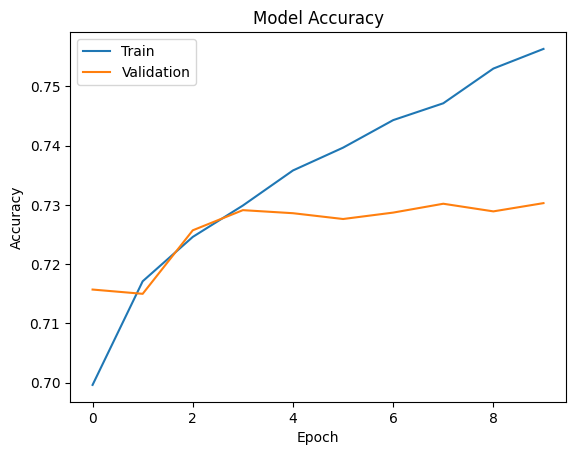

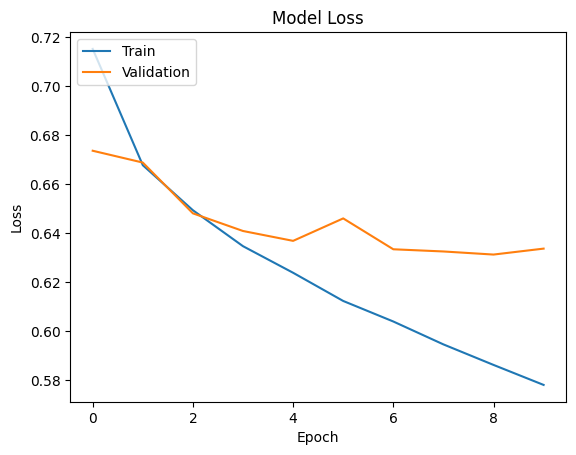

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Use Input layer explicitly
model.add(LSTM(units=128))  # LSTM layer with 128 units
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(3, activation='softmax'))  # Output layer for multi-class classification

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to monitor the validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=10,  # Set the number of epochs
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  # Use early stopping
    verbose=1
)



In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# LSTM with early stopping

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Explicit input shape
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.2))  # Dropout layer to help prevent overfitting
lstm_model.add(Dense(3, activation='softmax'))  # Output layer for multi-class classification

# Compile the model with a lower learning rate
lstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to monitor the validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = lstm_model.fit(
    X_train, y_train,
    epochs=10,  # Set the number of epochs
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  # Use early stopping
    verbose=1
)




Epoch 1/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.6795 - loss: 0.7751 - val_accuracy: 0.7086 - val_loss: 0.6914
Epoch 2/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7107 - loss: 0.6895 - val_accuracy: 0.7161 - val_loss: 0.6716
Epoch 3/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7165 - loss: 0.6728 - val_accuracy: 0.7208 - val_loss: 0.6650
Epoch 4/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7186 - loss: 0.6597 - val_accuracy: 0.7213 - val_loss: 0.6553
Epoch 5/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7223 - loss: 0.6537 - val_accuracy: 0.7236 - val_loss: 0.6541
Epoch 6/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7275 - loss: 0.6445 - val_accuracy: 0.7263 - val_loss: 0.6462
Epoch 7/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7266 - loss: 0.6428 - val_accuracy: 0.7276 - val_loss: 0.6404
Epoch 8/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7342 - loss: 0

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7251 - loss: 0.6446
Test Accuracy: 72.37%


In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Save the model to a specific path in your Google Drive
lstm_model.save('/content/drive/MyDrive/path_to_save/lstm_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


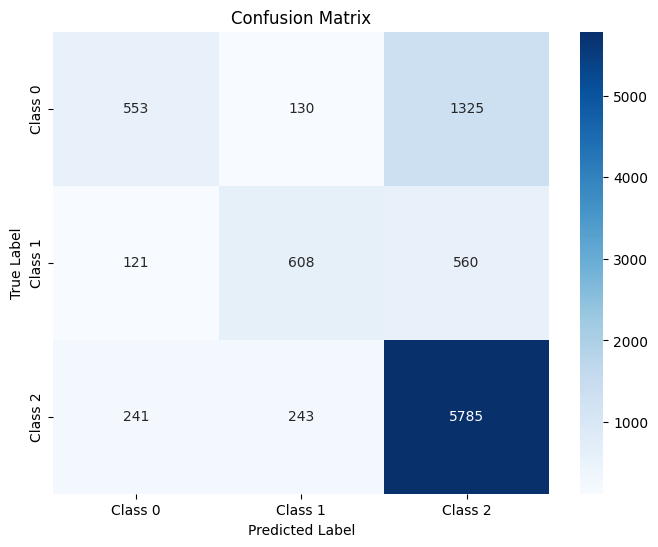

              precision    recall  f1-score   support

     Class 0       0.60      0.28      0.38      2008
     Class 1       0.62      0.47      0.54      1289
     Class 2       0.75      0.92      0.83      6269

    accuracy                           0.73      9566
   macro avg       0.66      0.56      0.58      9566
weighted avg       0.70      0.73      0.70      9566



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions on the test set
y_pred_prob = model.predict(X_test)  # Predict class probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print the classification report for additional metrics
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

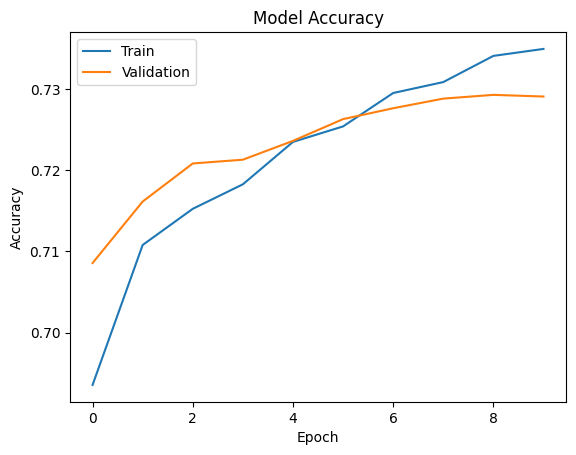

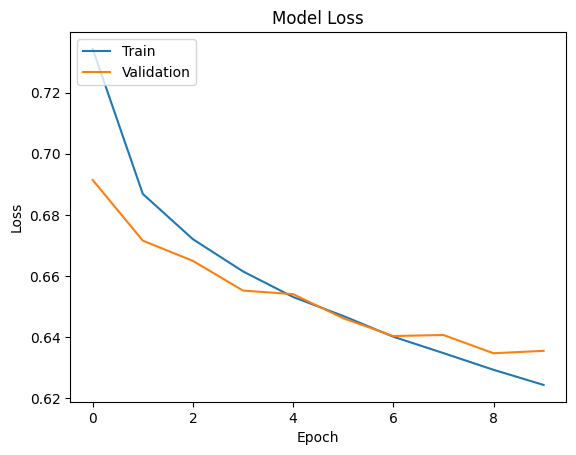

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3, activation='softmax'))  # Use 'softmax' for multi-class classification (3 sentiment classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(
    X_train, y_train,
    epochs=10,  # Set the number of epochs
    batch_size=32,
    validation_data=(X_val, y_val)
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3, activation='softmax'))  # Use 'softmax' for multi-class classification (3 sentiment classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(
    X_train, y_train,
    epochs=10,  # Set the number of epochs
    batch_size=32,
    validation_data=(X_val, y_val)
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6886 - loss: 0.7471 - val_accuracy: 0.7122 - val_loss: 0.6731
Epoch 2/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7140 - loss: 0.6750 - val_accuracy: 0.7210 - val_loss: 0.6624
Epoch 3/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7270 - loss: 0.6500 - val_accuracy: 0.7242 - val_loss: 0.6494
Epoch 4/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7281 - loss: 0.6392 - val_accuracy: 0.7272 - val_loss: 0.6437
Epoch 5/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7396 - loss: 0.6164 - val_accuracy: 0.7253 - val_loss: 0.6476
Epoch 6/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7403 - loss: 0.6156 - val_accuracy: 0.7300 - val_loss: 0.6313
Epoch 7/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7473 - loss: 0.5994 - val_accuracy: 0.7292 - val_loss: 0.6340
Epoch 8/10
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7519 - loss: 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3, activation='softmax'))  # Use 'softmax' for multi-class classification (3 sentiment classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(
    X_train, y_train,
    epochs=10,  # Set the number of epochs
    batch_size=32,
    validation_data=(X_val, y_val)
)


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7297 - loss: 0.6359
Test Accuracy: 72.73%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Confusion Matrix:
[[ 677  143 1188]
 [ 154  605  530]
 [ 363  231 5675]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.34      0.42      2008
           1       0.62      0.47      0.53      1289
           2       0.77      0.91      0.83      6269

    accuracy                           0.73      9566
   macro avg       0.65      0.57      0.60      9566
weighted avg       0.71      0.73      0.71      9566



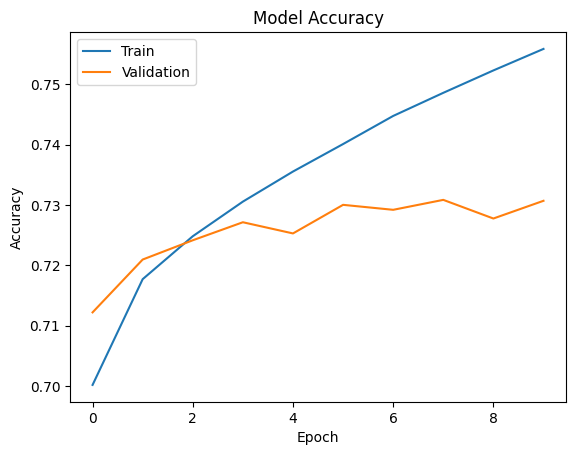

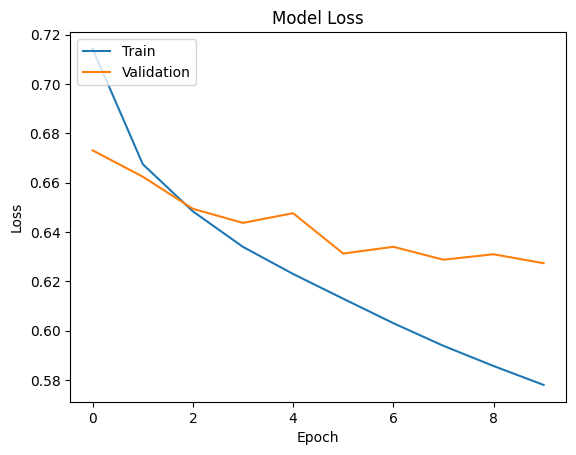

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


FOR EXAMPLE PROMT


In [ ]:
import numpy as np

def preprocess_prompt(prompt, word2vec_model):
    # Tokenize the input prompt (split into words)
    tokens = prompt.split()

    # Generate Word2Vec embeddings for each token
    # Use the average vector of all tokens present in the model's vocabulary
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])

    # If there are no valid embeddings, return a zero vector
    if len(embeddings) == 0:
        embeddings = [np.zeros(word2vec_model.vector_size)]

    # Compute the average embedding
    average_embedding = np.mean(embeddings, axis=0)

    # Reshape the input to match the model's expected input shape (1, time_steps, vector_size)
    average_embedding = average_embedding.reshape(1, 1, -1)
    return average_embedding

# Example prompt
new_prompt = "This movie was heartwarming and uplifting."

# Preprocess the prompt using the same Word2Vec model you trained earlier
X_new = preprocess_prompt(new_prompt, word2vec_model)


# LSTM with early stopping - 20 epoch

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Explicit input shape
model.add(LSTM(units=128))
model.add(Dropout(0.3))  # Use a dropout rate of 0.3 to prevent overfitting
model.add(Dense(3, activation='softmax'))  # Output layer for multi-class classification

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to monitor the validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model with early stopping and learning rate scheduler
history = model.fit(
    X_train, y_train,
    epochs=20,  # Train for more epochs
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],  # Use early stopping and learning rate reduction
    verbose=1
)




Epoch 1/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6689 - loss: 0.7890 - val_accuracy: 0.7090 - val_loss: 0.6936 - learning_rate: 5.0000e-04
Epoch 2/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7044 - loss: 0.6972 - val_accuracy: 0.7161 - val_loss: 0.6735 - learning_rate: 5.0000e-04
Epoch 3/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7123 - loss: 0.6760 - val_accuracy: 0.7211 - val_loss: 0.6630 - learning_rate: 5.0000e-04
Epoch 4/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7214 - loss: 0.6662 - val_accuracy: 0.7211 - val_loss: 0.6556 - learning_rate: 5.0000e-04
Epoch 5/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7229 - loss: 0.6577 - val_accuracy: 0.7264 - val_loss: 0.6529 - learning_rate: 5.0000e-04
Epoch 6/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7221 - loss: 0.6576 - val_accuracy: 0.7237 - val_loss: 0.6495 - learning_rate: 5.0000e-04
Epoch 7/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7350 - loss: 0.6302
Test Accuracy: 73.01%


299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


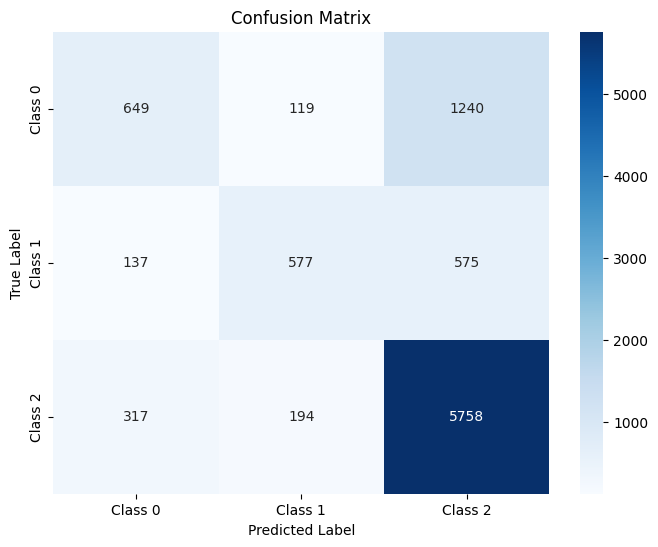

              precision    recall  f1-score   support

     Class 0       0.59      0.32      0.42      2008
     Class 1       0.65      0.45      0.53      1289
     Class 2       0.76      0.92      0.83      6269

    accuracy                           0.73      9566
   macro avg       0.67      0.56      0.59      9566
weighted avg       0.71      0.73      0.70      9566



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions on the test set
y_pred_prob = model.predict(X_test)  # Predict class probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print the classification report for additional metrics
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get TP, FP, TN, and FN for each class
TP = np.diag(conf_matrix)  # True Positives are the diagonal elements
FP = np.sum(conf_matrix, axis=0) - TP  # False Positives are the sum of columns minus TP
FN = np.sum(conf_matrix, axis=1) - TP  # False Negatives are the sum of rows minus TP
TN = np.sum(conf_matrix) - (FP + FN + TP)  # True Negatives are the rest

# Print results for each class
for i in range(len(TP)):
    print(f"Class {i}:")
    print(f"  True Positives: {TP[i]}")
    print(f"  False Positives: {FP[i]}")
    print(f"  False Negatives: {FN[i]}")
    print(f"  True Negatives: {TN[i]}")
    print()


299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Class 0:
  True Positives: 649
  False Positives: 454
  False Negatives: 1359
  True Negatives: 7104

Class 1:
  True Positives: 577
  False Positives: 313
  False Negatives: 712
  True Negatives: 7964

Class 2:
  True Positives: 5758
  False Positives: 1815
  False Negatives: 511
  True Negatives: 1482



# BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define the BiLSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Explicit input shape
model.add(Bidirectional(LSTM(units=128)))  # BiLSTM layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(3, activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,  # Number of epochs
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],  # Use early stopping and learning rate reduction
    verbose=1
)




Epoch 1/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.6805 - loss: 0.7710 - val_accuracy: 0.7117 - val_loss: 0.6857 - learning_rate: 5.0000e-04
Epoch 2/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.7108 - loss: 0.6845 - val_accuracy: 0.7169 - val_loss: 0.6720 - learning_rate: 5.0000e-04
Epoch 3/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7153 - loss: 0.6720 - val_accuracy: 0.7172 - val_loss: 0.6624 - learning_rate: 5.0000e-04
Epoch 4/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7200 - loss: 0.6612 - val_accuracy: 0.7240 - val_loss: 0.6521 - learning_rate: 5.0000e-04
Epoch 5/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7257 - loss: 0.6480 - val_accuracy: 0.7266 - val_loss: 0.6435 - learning_rate: 5.0000e-04
Epoch 6/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7273 - loss: 0.6433 - val_accuracy: 0.7301 - val_loss: 0.6406 - learning_rate: 5.0000e-04
Epoch 7/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 21s

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7339 - loss: 0.6305
Test Accuracy: 72.77%


299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


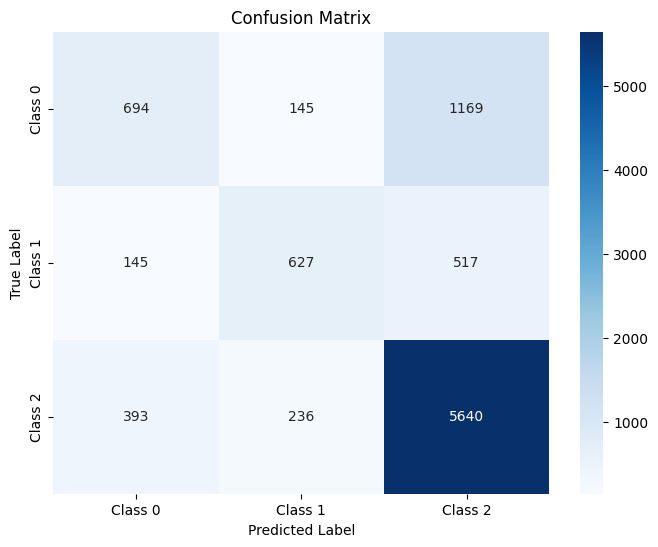

              precision    recall  f1-score   support

     Class 0       0.56      0.35      0.43      2008
     Class 1       0.62      0.49      0.55      1289
     Class 2       0.77      0.90      0.83      6269

    accuracy                           0.73      9566
   macro avg       0.65      0.58      0.60      9566
weighted avg       0.71      0.73      0.71      9566



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions on the test set
y_pred_prob = model.predict(X_test)  # Predict class probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print the classification report for additional metrics
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get TP, FP, TN, and FN for each class
TP = np.diag(conf_matrix)  # True Positives are the diagonal elements
FP = np.sum(conf_matrix, axis=0) - TP  # False Positives are the sum of columns minus TP
FN = np.sum(conf_matrix, axis=1) - TP  # False Negatives are the sum of rows minus TP
TN = np.sum(conf_matrix) - (FP + FN + TP)  # True Negatives are the rest

# Print results for each class
for i in range(len(TP)):
    print(f"Class {i}:")
    print(f"  True Positives: {TP[i]}")
    print(f"  False Positives: {FP[i]}")
    print(f"  False Negatives: {FN[i]}")
    print(f"  True Negatives: {TN[i]}")
    print()


299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Class 0:
  True Positives: 694
  False Positives: 538
  False Negatives: 1314
  True Negatives: 7020

Class 1:
  True Positives: 627
  False Positives: 381
  False Negatives: 662
  True Negatives: 7896

Class 2:
  True Positives: 5640
  False Positives: 1686
  False Negatives: 629
  True Negatives: 1611



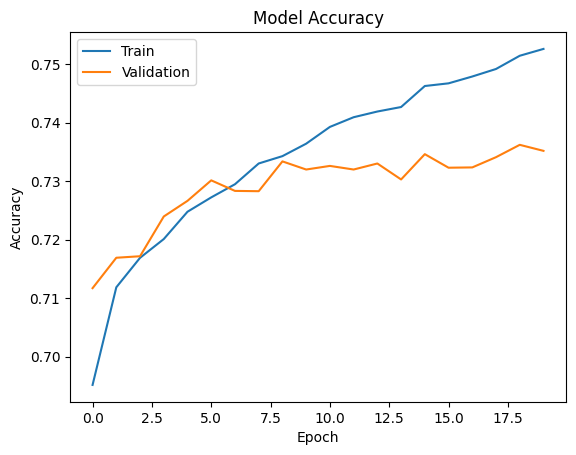

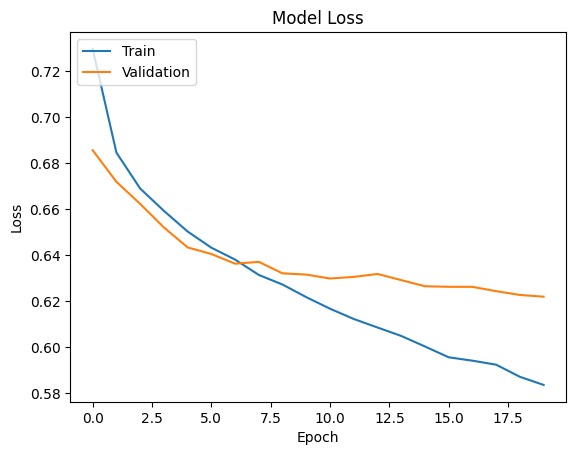

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from google.colab import drive

# Save the model to a specific path in your Google Drive
model.save('/content/drive/MyDrive/path_to_save/bilstm_model.keras')


# CNN with BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define the BiLSTM-CNN hybrid model
cnn_bilstm_model = Sequential()
cnn_bilstm_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Explicit input shape

# 1D Convolutional layer with a smaller kernel size to handle the short sequence length
cnn_bilstm_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_bilstm_model.add(MaxPooling1D(pool_size=1))  # Max pooling layer

# BiLSTM layer for capturing sequential dependencies
cnn_bilstm_model.add(Bidirectional(LSTM(units=128)))

# Dropout layer to prevent overfitting
cnn_bilstm_model.add(Dropout(0.3))

# Dense output layer for multi-class classification
cnn_bilstm_model.add(Dense(3, activation='softmax'))

# Compile the model
cnn_bilstm_model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = cnn_bilstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)




Epoch 1/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.6787 - loss: 0.7734 - val_accuracy: 0.7137 - val_loss: 0.6743 - learning_rate: 5.0000e-04
Epoch 2/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.7160 - loss: 0.6731 - val_accuracy: 0.7180 - val_loss: 0.6609 - learning_rate: 5.0000e-04
Epoch 3/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.7181 - loss: 0.6615 - val_accuracy: 0.7211 - val_loss: 0.6530 - learning_rate: 5.0000e-04
Epoch 4/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.7272 - loss: 0.6442 - val_accuracy: 0.7251 - val_loss: 0.6459 - learning_rate: 5.0000e-04
Epoch 5/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7303 - loss: 0.6370 - val_accuracy: 0.7228 - val_loss: 0.6479 - learning_rate: 5.0000e-04
Epoch 6/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7327 - loss: 0.6292 - val_accuracy: 0.7285 - val_loss: 0.6433 - learning_rate: 5.0000e-04
Epoch 7/20
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_bilstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7264 - loss: 0.6370
Test Accuracy: 72.40%


299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


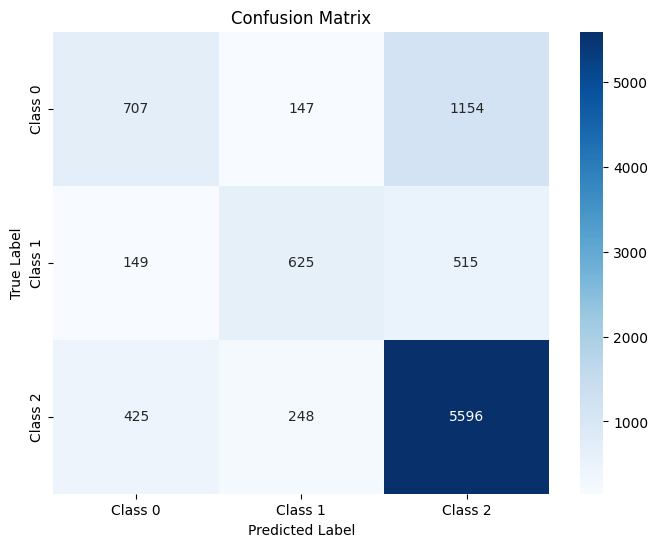

              precision    recall  f1-score   support

     Class 0       0.55      0.35      0.43      2008
     Class 1       0.61      0.48      0.54      1289
     Class 2       0.77      0.89      0.83      6269

    accuracy                           0.72      9566
   macro avg       0.64      0.58      0.60      9566
weighted avg       0.70      0.72      0.71      9566



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions on the test set
y_pred_prob = cnn_bilstm_model.predict(X_test)  # Predict class probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Step 2: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Print the classification report for additional metrics
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_prob = cnn_bilstm_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get TP, FP, TN, and FN for each class
TP = np.diag(conf_matrix)  # True Positives are the diagonal elements
FP = np.sum(conf_matrix, axis=0) - TP  # False Positives are the sum of columns minus TP
FN = np.sum(conf_matrix, axis=1) - TP  # False Negatives are the sum of rows minus TP
TN = np.sum(conf_matrix) - (FP + FN + TP)  # True Negatives are the rest

# Print results for each class
for i in range(len(TP)):
    print(f"Class {i}:")
    print(f"  True Positives: {TP[i]}")
    print(f"  False Positives: {FP[i]}")
    print(f"  False Negatives: {FN[i]}")
    print(f"  True Negatives: {TN[i]}")
    print()


299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Class 0:
  True Positives: 697
  False Positives: 561
  False Negatives: 1311
  True Negatives: 6997

Class 1:
  True Positives: 661
  False Positives: 442
  False Negatives: 628
  True Negatives: 7835

Class 2:
  True Positives: 5568
  False Positives: 1637
  False Negatives: 701
  True Negatives: 1660



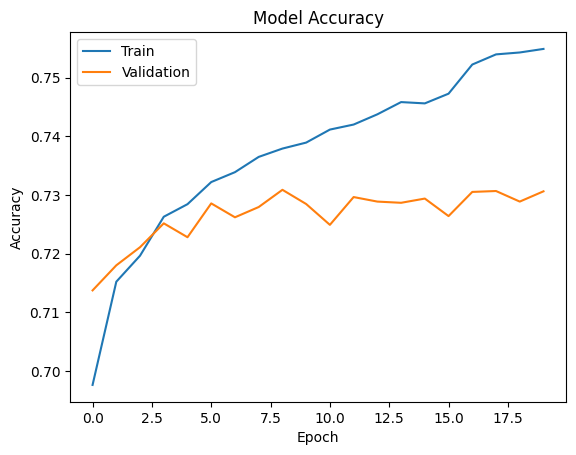

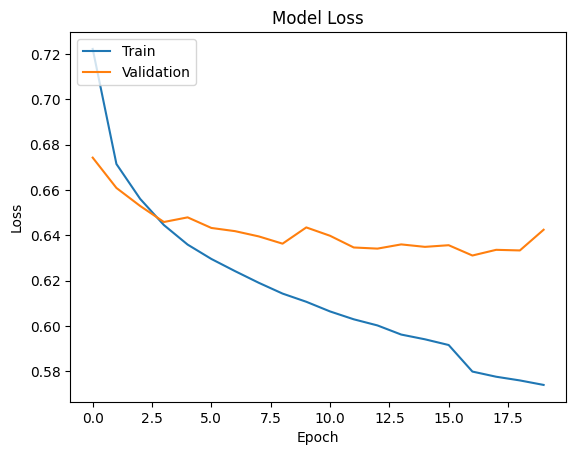

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:


# Save the model to a specific path in your Google Drive
cnn_bilstm_model.save('/content/drive/MyDrive/path_to_save/cnn_bilstm_model.keras')
